#Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from sklearn.naive_bayes import MultinomialNB

In [3]:
from sklearn.metrics import *
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import timeit

In [16]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [39]:
from sklearn.svm import SVC

In [63]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [72]:
import transformers
from transformers import BertTokenizer, TFBertForSequenceClassification, AdamWeightDecay

#DataFrame

In [5]:
train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test (1).csv')
valid = pd.read_csv('/content/valid.csv')

In [6]:
print(train.isnull().sum(),'\n\n')
print(test.isnull().sum(),'\n\n')
print(valid.isnull().sum(),'\n\n')

review        0
clean_text    3
sentiment     0
dtype: int64 


review        0
clean_text    2
sentiment     0
dtype: int64 


review        0
clean_text    1
sentiment     0
dtype: int64 




In [7]:
# Remove rows with missing values for all datasets
train.dropna(inplace=True)
test.dropna(inplace=True)
valid.dropna(inplace=True)

#TF-IDF

In [8]:
# Combine the training and validation text to ensure the vectorizer fits on all seen data
train_valid_texts = train['clean_text'].tolist() + valid['clean_text'].tolist()
test_texts = test['clean_text'].tolist()

# Initialize the TfidfVectorizer with desired parameters
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

# Fit on the combined training and validation texts, and transform each dataset
X_train_tfidf = tfidf.fit_transform(train['clean_text'])
X_valid_tfidf = tfidf.transform(valid['clean_text'])
X_test_tfidf = tfidf.transform(test['clean_text'])



#Model training

##Naive Bayes

In [11]:
train_y=train['sentiment'].tolist()
test_y = test['sentiment'].tolist()
# Tạo mô hình Naive Bayes sử dụng sklearn thay vì nltk
classifier = MultinomialNB()

#Mesure runtime
start_time = timeit.default_timer()

# Huấn luyện mô hình với dữ liệu huấn luyện TF-IDF
classifier.fit(X_train_tfidf, train_y)

#Calculate run time
end_time = timeit.default_timer()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Dự đoán với dữ liệu kiểm tra
predicted_y = classifier.predict(X_test_tfidf)

Runtime: 0.007095300000003135 seconds


In [12]:
# Tính toán các chỉ số đánh giá
accuracy = accuracy_score(test_y, predicted_y)
recall = recall_score(test_y, predicted_y, average='weighted')
precision = precision_score(test_y, predicted_y, average='weighted')
f1 = f1_score(test_y, predicted_y, average='weighted')

# In ra các chỉ số
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')


Accuracy: 0.696652719665272
Recall: 0.696652719665272
Precision: 0.7512474719957966
F1 Score: 0.612287531520628


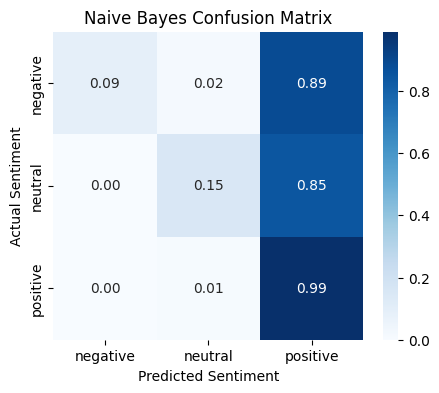

In [13]:
conf_mat = confusion_matrix(test_y, predicted_y)

# Define the sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']

# Tính tổng số lượng mẫu thực tế cho mỗi lớp
row_sums = conf_mat.sum(axis=1)

# Chuẩn hóa ma trận nhầm lẫn bằng cách chia cho tổng số lượng mẫu thực tế
norm_conf_mat = conf_mat / row_sums[:, np.newaxis]

# Tạo nhãn cho mỗi ô
labels = [f'{val:.2f}' for val in norm_conf_mat.flatten()]
labels = np.asarray(labels).reshape(norm_conf_mat.shape)

# Vẽ ma trận nhầm lẫn đã chuẩn hóa
plt.figure(figsize=(5,4))
sns.heatmap(norm_conf_mat, annot=labels, fmt='', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

##Random Forest

In [50]:
train_y=train['sentiment'].tolist()
test_y = test['sentiment'].tolist()

# Tạo mô hình Random Forest
classifier = RandomForestClassifier()

#Mesure runtime
start_time = timeit.default_timer()

# Huấn luyện mô hình với dữ liệu huấn luyện TF-IDF
classifier.fit(X_train_tfidf, train_y)

#Calculate run time
end_time = timeit.default_timer()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Dự đoán với dữ liệu kiểm tra
predicted_y = classifier.predict(X_test_tfidf)


Runtime: 1.1292081419996975 seconds


In [51]:
# Save the trained model to a file
filename = 'RandomForest_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

# Save the TF-IDF vectorizer to a file
filename_tfidf = 'tfidf_vectorizer.pkl'
pickle.dump(tfidf, open(filename_tfidf, 'wb'))

print("Model and TF-IDF vectorizer saved successfully!")

Model and TF-IDF vectorizer saved successfully!


In [52]:
#Evaluate with metrics
accuracy = accuracy_score(test_y, predicted_y)
recall = recall_score(test_y, predicted_y, average='weighted')
precision = precision_score(test_y, predicted_y, average='weighted')
f1 = f1_score(test_y, predicted_y, average='weighted')

# Print out the evaluation
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

Accuracy: 0.8221757322175732
Recall: 0.8221757322175732
Precision: 0.8293112036741752
F1 Score: 0.8066010529888036


In [53]:
#Evaluate metrics
print(classification_report(test_y, predicted_y, digits = 4))

              precision    recall  f1-score   support

    negative     0.8235    0.2593    0.3944        54
     neutral     0.6906    0.8727    0.7711       110
    positive     0.8789    0.9013    0.8899       314

    accuracy                         0.8222       478
   macro avg     0.7977    0.6778    0.6851       478
weighted avg     0.8293    0.8222    0.8066       478



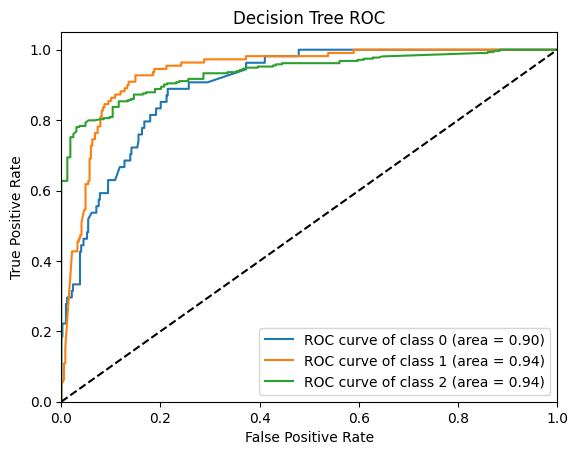

Macro-average AUC: 0.9243925356849889
Micro-average AUC: 0.9440814236445441


In [54]:
# Binarize the output
train_y_bin = label_binarize(train_y, classes=np.unique(train_y))
test_y_bin = label_binarize(test_y, classes=np.unique(train_y))

# Compute the predicted probabilities
predicted_probs = classifier.predict_proba(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(train_y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

# Compute Macro-average AUC
macro_auc = roc_auc_score(test_y_bin, predicted_probs, multi_class='ovr', average='macro')
print('Macro-average AUC:', macro_auc)

# Compute Micro-average AUC
micro_auc = roc_auc_score(test_y_bin, predicted_probs, multi_class='ovr', average='micro')
print('Micro-average AUC:', micro_auc)

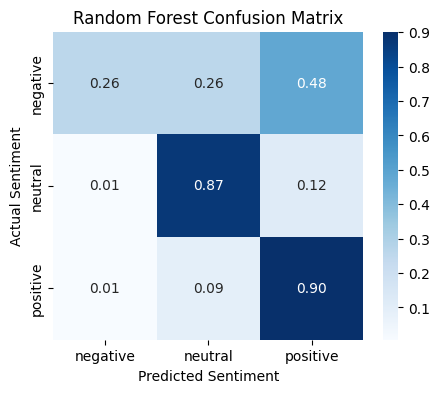

In [55]:
# create confusion matrix
conf_mat = confusion_matrix(test_y, predicted_y)

# Define the sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']

# Tính tổng số lượng mẫu thực tế cho mỗi lớp
row_sums = conf_mat.sum(axis=1)

# Chuẩn hóa ma trận nhầm lẫn bằng cách chia cho tổng số lượng mẫu thực tế
norm_conf_mat = conf_mat / row_sums[:, np.newaxis]

# Tạo nhãn cho mỗi ô
labels = [f'{val:.2f}' for val in norm_conf_mat.flatten()]
labels = np.asarray(labels).reshape(norm_conf_mat.shape)

# Vẽ ma trận nhầm lẫn đã chuẩn hóa
plt.figure(figsize=(5,4))
sns.heatmap(norm_conf_mat, annot=labels, fmt='', cmap='Blues',  xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Random Forest Confusion Matrix')
plt.savefig('RF_confusion_matrix')
plt.show()

##SVM

In [58]:
train_y=train['sentiment'].tolist()
test_y = test['sentiment'].tolist()

# Create classifier using SVM model
classifier = SVC(kernel='linear')

#Mesure runtime
start_time = timeit.default_timer()

# Training
classifier.fit(X_train_tfidf, train_y)

#Calculate run time
end_time = timeit.default_timer()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Predict using trained model
predicted_y = classifier.predict(X_test_tfidf)

Runtime: 0.20055958900002224 seconds


In [59]:
# Save the trained model to a file
filename = 'SVM_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

print("SVM model saved successfully!")

SVM model saved successfully!


In [60]:
#Evaluate with metrics
accuracy = accuracy_score(test_y, predicted_y)
recall = recall_score(test_y, predicted_y, average='weighted')
precision = precision_score(test_y, predicted_y, average='weighted')
f1 = f1_score(test_y, predicted_y, average='weighted')

# Print out the evaluation
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

Accuracy: 0.8221757322175732
Recall: 0.8221757322175732
Precision: 0.814504230359202
F1 Score: 0.8122669509589575


In [61]:
#Evaluate metrics
print(classification_report(test_y, predicted_y, digits = 4))

              precision    recall  f1-score   support

    negative     0.6897    0.3704    0.4819        54
     neutral     0.7565    0.7909    0.7733       110
    positive     0.8563    0.9108    0.8827       314

    accuracy                         0.8222       478
   macro avg     0.7675    0.6907    0.7127       478
weighted avg     0.8145    0.8222    0.8123       478



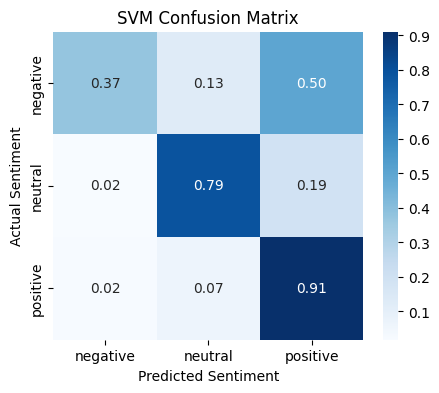

In [62]:
# Confusion Matrix
conf_mat = confusion_matrix(test_y, predicted_y)

# Define the sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']

# Tính tổng số lượng mẫu thực tế cho mỗi lớp
row_sums = conf_mat.sum(axis=1)

# Chuẩn hóa ma trận nhầm lẫn bằng cách chia cho tổng số lượng mẫu thực tế
norm_conf_mat = conf_mat / row_sums[:, np.newaxis]

# Tạo nhãn cho mỗi ô
labels = [f'{val:.2f}' for val in norm_conf_mat.flatten()]
labels = np.asarray(labels).reshape(norm_conf_mat.shape)

# Vẽ ma trận nhầm lẫn đã chuẩn hóa
plt.figure(figsize=(5,4))
sns.heatmap(norm_conf_mat, annot=labels, fmt='', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('SVM Confusion Matrix')
plt.savefig('SVM_confusion_matrix')
plt.show()

#Deep Learning
RNN using LSTM layer

In [90]:
# Combine the training and validation text to ensure the vectorizer fits on all seen data
train_valid_texts = train['clean_text'].tolist() + valid['clean_text'].tolist()
train_valid_labels = train['sentiment'].tolist() + valid['sentiment'].tolist()

test_texts = test['clean_text'].tolist()
test_labels = test['sentiment'].tolist()

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # number of words can be adjusted
tokenizer.fit_on_texts(train_valid_texts)

X_train_seq = tokenizer.texts_to_sequences(train['clean_text'])
X_valid_seq = tokenizer.texts_to_sequences(valid['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(test['clean_text'])

# Pad sequences to have the same length
max_sequence_length = 100  # You can adjust this based on your data
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_valid_pad = pad_sequences(X_valid_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Convert labels to numerical format (if needed)
y_train = train['sentiment']
y_valid = valid['sentiment']
y_test = test['sentiment']


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

# Build the neural network model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3 classes for sentiment (negative, neutral, positive)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Mesure runtime
start_time = timeit.default_timer()

# Train the model
model.fit(X_train_pad, y_train, validation_data=(X_valid_pad, y_valid), epochs=5, batch_size=32)

#Calculate run time
end_time = timeit.default_timer()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Evaluate the model on the test set
y_pred = model.predict(X_test_pad)
y_pred_classes = [np.argmax(pred) for pred in y_pred]  # Convert probabilities to class labels

# accuracy = accuracy_score(y_test, y_pred_classes)
# print("Accuracy:", accuracy)
# print(classification_report(y_test, y_pred_classes))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.6027 - loss: 0.9371 - val_accuracy: 0.6736 - val_loss: 0.7247
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.7121 - loss: 0.6720 - val_accuracy: 0.7992 - val_loss: 0.5094
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.8667 - loss: 0.3993 - val_accuracy: 0.7992 - val_loss: 0.4920
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.9397 - loss: 0.2142 - val_accuracy: 0.8117 - val_loss: 0.5721
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.9490 - loss: 0.1562 - val_accuracy: 0.8243 - val_loss: 0.5749
Runtime: 85.46539623200078 seconds
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [91]:
# Save the trained model to a file
filename_rnn = 'RNN_model.keras'
model.save(filename_rnn)

print("RNN model saved successfully!")

RNN model saved successfully!


In [92]:
filename_tokenizer = 'tokenizer_rnn.pkl'
with open(filename_tokenizer, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [93]:
#Evaluate with metrics
accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print out the evaluation
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

Accuracy: 0.8347280334728033
Recall: 0.8347280334728033
Precision: 0.8267858265020567
F1 Score: 0.8298300015792237


In [94]:
print(classification_report(y_test, y_pred_classes, digits = 4))

              precision    recall  f1-score   support

           0     0.5455    0.4444    0.4898        54
           1     0.7925    0.7636    0.7778       110
           2     0.8872    0.9268    0.9065       314

    accuracy                         0.8347       478
   macro avg     0.7417    0.7116    0.7247       478
weighted avg     0.8268    0.8347    0.8298       478



In [70]:
#Test on random string
def predict_sentiment(input_string, classifier, tfidf):
  """
  Predicts the sentiment of an input string using the trained SVM model.

  Args:
    input_string: The input string to classify.
    classifier: The trained SVM classifier.
    tfidf: The TF-IDF vectorizer used for feature extraction.

  Returns:
    The predicted sentiment label.
  """

  input_tfidf = tfidf.transform([input_string])
  predicted_sentiment = classifier.predict(input_tfidf)[0]
  return predicted_sentiment


# Example usage:
input_string = "this game always crashes, it pisses me off 😡!?!"
predicted_sentiment = predict_sentiment(input_string, classifier, tfidf)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: positive


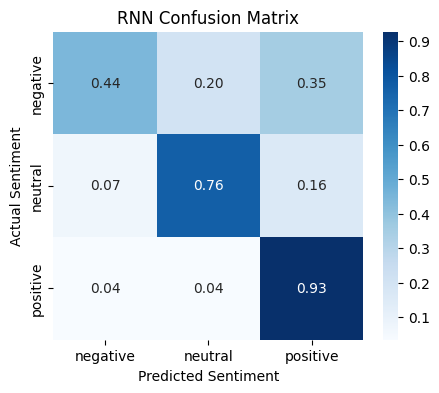

In [95]:
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Define the sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']

# Tính tổng số lượng mẫu thực tế cho mỗi lớp
row_sums = conf_mat.sum(axis=1)

# Chuẩn hóa ma trận nhầm lẫn bằng cách chia cho tổng số lượng mẫu thực tế
norm_conf_mat = conf_mat / row_sums[:, np.newaxis]

# Tạo nhãn cho mỗi ô
labels = [f'{val:.2f}' for val in norm_conf_mat.flatten()]
labels = np.asarray(labels).reshape(norm_conf_mat.shape)

# Vẽ ma trận nhầm lẫn đã chuẩn hóa
plt.figure(figsize=(5,4))
sns.heatmap(norm_conf_mat, annot=labels, fmt='', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('RNN Confusion Matrix')
plt.savefig('RNN_confusion_matrix')
plt.show()

#Transfer learning

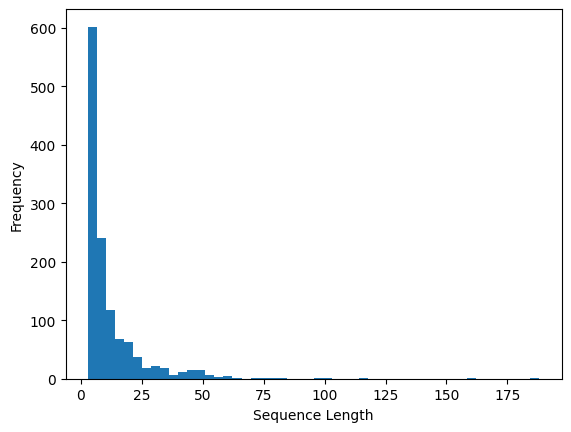

In [ ]:
# Calculate the length of each tokenized sequence in the training data
seq_lengths = [len(tokenizer.encode(text)) for text in train['clean_text'].tolist()]
plt.hist(seq_lengths, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

In [73]:
# Choose a pre-trained BERT model (e.g., 'bert-base-uncased')
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 classes for sentiment

# Prepare the input data for BERT
def prepare_bert_input(texts):
    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,  # Supposed to be cover the avg rage (from the histogram above)
        return_tensors='tf'
    )
    # return inputs
    # Convert the BatchEncoding object to a dictionary of tensors
    return {key: inputs[key] for key in inputs}

X_train_bert = prepare_bert_input(train['clean_text'].tolist())
X_valid_bert = prepare_bert_input(valid['clean_text'].tolist())
X_test_bert = prepare_bert_input(test['clean_text'].tolist())

# Compile the BERT model
# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01) # Example weight decay rate
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
bert_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
#Mesure runtime
start_time = timeit.default_timer()

# Train the BERT model
bert_model.fit(
    X_train_bert,
    y_train,
    validation_data=(X_valid_bert, y_valid),
    epochs=3,  # Adjust as needed
    batch_size=32  # Adjust as needed
)
#Calculate run time
end_time = timeit.default_timer()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")


Epoch 1/3
53/53 [==============================] - 2804s 53s/step - loss: 0.7269 - accuracy: 0.7191 - val_loss: 0.4618 - val_accuracy: 0.8159
Epoch 2/3
53/53 [==============================] - 2772s 52s/step - loss: 0.3720 - accuracy: 0.8724 - val_loss: 0.4568 - val_accuracy: 0.8536
Epoch 3/3
53/53 [==============================] - 2787s 53s/step - loss: 0.2265 - accuracy: 0.9302 - val_loss: 0.3730 - val_accuracy: 0.8452
Runtime: 8422.368232798 seconds


In [86]:
# prompt: save bert model (after training) and bert tokenizer for future use

# Save the BERT model
bert_model.save_pretrained("bert_sentiment_model")

# Save the BERT tokenizer
tokenizer.save_pretrained("bert_sentiment_tokenizer")

print("BERT model and tokenizer saved successfully!")

BERT model and tokenizer saved successfully!


In [76]:
# Evaluate the BERT model
y_pred_bert = bert_model.predict(X_test_bert)
# y_pred_classes_bert = [np.argmax(pred.logits) for pred in y_pred_bert]


15/15 [==============================] - 232s 15s/step


In [77]:
y_pred_classes_bert = np.argmax(y_pred_bert.logits, axis=-1)

In [78]:
accuracy_bert = accuracy_score(y_test, y_pred_classes_bert)
print("BERT Accuracy:", accuracy_bert)
print(classification_report(y_test, y_pred_classes_bert, digits = 4))

BERT Accuracy: 0.8807531380753139
              precision    recall  f1-score   support

           0     0.6176    0.7778    0.6885        54
           1     0.8776    0.7818    0.8269       110
           2     0.9391    0.9331    0.9361       314

    accuracy                         0.8808       478
   macro avg     0.8114    0.8309    0.8172       478
weighted avg     0.8886    0.8808    0.8830       478



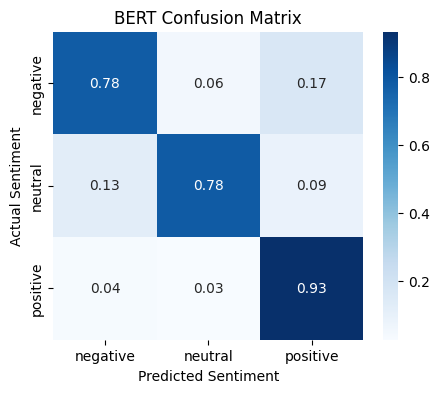

In [79]:
# Create the confusion matrix for BERT
conf_mat_bert = confusion_matrix(y_test, y_pred_classes_bert)

# Define the sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']

# Tính tổng số lượng mẫu thực tế cho mỗi lớp
row_sums = conf_mat_bert.sum(axis=1)

# Chuẩn hóa ma trận nhầm lẫn bằng cách chia cho tổng số lượng mẫu thực tế
norm_conf_mat_bert = conf_mat_bert / row_sums[:, np.newaxis]

# Tạo nhãn cho mỗi ô
labels = [f'{val:.2f}' for val in norm_conf_mat_bert.flatten()]
labels = np.asarray(labels).reshape(norm_conf_mat_bert.shape)

# Vẽ ma trận nhầm lẫn đã chuẩn hóa
plt.figure(figsize=(5,4))
sns.heatmap(norm_conf_mat_bert, annot=labels, fmt='', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('BERT Confusion Matrix')
plt.savefig('BERT_confusion_matrix')
plt.show()

In [ ]:
bert_model


#All models on a test string

In [87]:
from tensorflow.keras.models import load_model

In [96]:
def predict_sentiment_with_loaded_models(input_string):
    """
    Loads saved models and predicts the sentiment of an input string using different models.

    Args:
        input_string: The input string to classify.

    Returns:
        A dictionary with the predicted sentiment for each model.
    """

    results = {}

    # Sentiment label mapping (adjust according to your dataset labels)
    sentiment_labels = {0: 'negative', 1: 'neutral', 2: 'positive'}

    # Load Naive Bayes
    # (No need to load Naive Bayes since it was not saved as a file)

    # Load Random Forest
    try:
        with open('RandomForest_model.pkl', 'rb') as file:
            rf_classifier = pickle.load(file)
        with open('tfidf_vectorizer.pkl', 'rb') as file:
            tfidf_vectorizer = pickle.load(file)
        input_tfidf = tfidf_vectorizer.transform([input_string])
        predicted_sentiment_rf = rf_classifier.predict(input_tfidf)[0]
        results['Random Forest'] = predicted_sentiment_rf  # Assuming the RF model already returns a string label
    except FileNotFoundError:
        print("Random Forest model file not found.")

    # Load SVM
    try:
        with open('SVM_model.pkl', 'rb') as file:
            svm_classifier = pickle.load(file)
        with open('tfidf_vectorizer.pkl', 'rb') as file:
            tfidf_vectorizer = pickle.load(file)
        input_tfidf = tfidf_vectorizer.transform([input_string])
        predicted_sentiment_svm = svm_classifier.predict(input_tfidf)[0]
        results['SVM'] = predicted_sentiment_svm  # Assuming the SVM model already returns a string label
    except FileNotFoundError:
        print("SVM model file not found.")

    # Load RNN
    try:
        rnn_model = load_model('RNN_model.keras')
        with open('tokenizer_rnn.pkl', 'rb') as file:
            rnn_tokenizer = pickle.load(file)
        input_seq = rnn_tokenizer.texts_to_sequences([input_string])
        input_pad = pad_sequences(input_seq, maxlen=100)
        y_pred = rnn_model.predict(input_pad)
        y_pred_classes = np.argmax(y_pred, axis=-1)[0]
        results['RNN'] = sentiment_labels[y_pred_classes]  # Convert numeric label to text
    except FileNotFoundError:
        print("RNN model file not found.")
    except Exception as e:
        print(f"Error with RNN model: {e}")

    # Load BERT
    try:
        loaded_bert_model = TFBertForSequenceClassification.from_pretrained("bert_sentiment_model")
        tokenizer = BertTokenizer.from_pretrained("bert_sentiment_tokenizer")
        input_bert = tokenizer(
            input_string,
            padding=True,
            truncation=True,
            max_length=128,  # Adjust as needed
            return_tensors='tf'
        )
        y_pred_bert = loaded_bert_model(input_bert)
        y_pred_classes_bert = np.argmax(y_pred_bert.logits.numpy(), axis=-1)[0]
        results['BERT'] = sentiment_labels[y_pred_classes_bert]  # Convert numeric label to text
    except FileNotFoundError:
        print("BERT model file or tokenizer not found.")
    except Exception as e:
        print(f"Error with BERT model: {e}")

    return results


In [84]:
import warnings
import os
from transformers import logging as transformers_logging

# Suppress specific warnings from transformers and TensorFlow
warnings.filterwarnings("ignore", category=UserWarning, module="transformers.modeling_tf_utils")

# Set TensorFlow log level to ERROR
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Set Hugging Face logging to error level
transformers_logging.set_verbosity_error()



In [97]:
# Example usage:
input_string = "this game is so overated, it's not that good !!??"
sentiment_predictions = predict_sentiment_with_loaded_models(input_string)

# Formatting the output for better readability
for model, sentiment in sentiment_predictions.items():
    print(f"{model} Prediction: {sentiment}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Random Forest Prediction: positive
SVM Prediction: positive
RNN Prediction: positive
BERT Prediction: negative
